This code takes about 5-10 mins to run

Reading Intan Technologies RHS Data File, Version 3.3

Found 16 amplifier channels.
Found 0 board ADC channels.
Found 0 board DAC channels.
Found 0 board digital input channels.
Found 0 board digital output channels.

File contains 60.002 seconds of data.  Amplifiers were sampled at 30.00 kS/s.
numsamples and numblocks
1800064
14063
FINISHED HEADER

Allocating memory for data...
Reading data from file...
10% done...
20% done...
30% done...
40% done...
50% done...
60% done...
70% done...
80% done...
90% done...
Parsing data...
No missing timestamps in data.
Done!  Elapsed time: 2.5 seconds
Filtering Data...
Filtering Done!

Reading Intan Technologies RHS Data File, Version 3.3

Found 16 amplifier channels.
Found 0 board ADC channels.
Found 0 board DAC channels.
Found 0 board digital input channels.
Found 0 board digital output channels.

File contains 60.002 seconds of data.  Amplifiers were sampled at 30.00 kS/s.
numsamples and numblocks
1800064


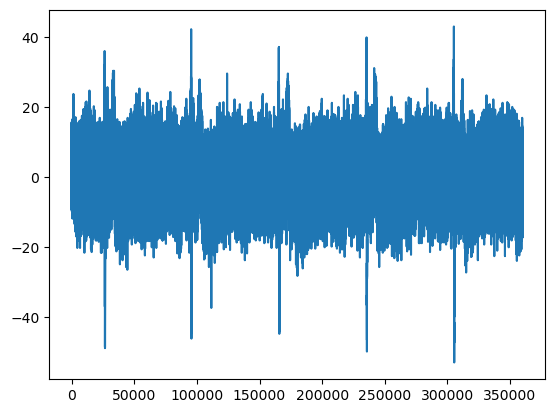

In [2]:
print("This code takes about 5-10 mins to run")
import sys
import os
sys.path.append(os.path.abspath(".."))
from organoid_contour import preprocessing
%matplotlib inline
sampling_rate = 30000
use_raw_data = 1
cutoff_frequency = 1000

data_path = "..\ExampleData\JK CO6 day after calcium imaging_240522_125041.rhs"
target_indeces = [0,1,2,3,4, 5,6,7,8,9,10,11, 12,13, 14, 15]

wanted_channel = list(range(16))

processed_data = preprocessing.processingPipline(data_path, data_path, cutoff=cutoff_frequency,fs_new= sampling_rate, one_address= 1)

if use_raw_data:
    raw_data = preprocessing.extract_raw_data(data_path, data_path)
    available_data = raw_data[:,:1800000];sampling_rate = 30000

target_data = available_data[target_indeces]
target_data_copy = target_data.copy()
import matplotlib.pyplot as plt
plt.plot(available_data[0,24*sampling_rate:36*sampling_rate])

In [ ]:
plt.plot(available_data[0,24*sampling_rate:36*sampling_rate])

In [17]:
import os
import matplotlib.pyplot as plt
import numpy as np

def save_raw_data_plots(available_data, target_indices, sampling_rate, start_second=1, sampling_second=1.6, y_lim=None, line_thickness=2.0, png_name="raw_data.png"):
    """
    Generate and save plots of raw data for given target indices.

    Args:
        available_data (list or array): Data from which to extract and plot.
        target_indices (list): Indices specifying which data to plot.
        sampling_rate (int): Sampling rate to determine start and sample size.
        start_second (float): Start time in seconds. Default is 1.
        sampling_second (float): Duration of sampling in seconds. Default is 1.6.
        y_lim (list, optional): List of Y-axis limits as (min, max) tuples for each channel. Default is None.
        line_thickness (float, optional): Thickness of the plot line. Default is 1.0.
        png_name (str, optional): Name of the saved PNG file. Default is "raw_data.png".

    Saves:
        Plots as PNG files in subfolders "processing_pipeline/channel_i/raw_data.png".
        Saves or loads Y-axis limits in "processing_pipeline/ylim.npy".
    """
    # Convert start and sample to integers
    start = int(start_second * sampling_rate)
    sample = int(sampling_second * sampling_rate)

    # Path for storing ylim
    ylim_path = "processing_pipeline/ylim.npy"

    # Load or initialize y_lim
    if os.path.exists(ylim_path):
        y_lim = np.load(ylim_path, allow_pickle=True).tolist()
        print("Loaded existing y_lim from", ylim_path)
    else:
        y_lim = []

    for i in range(len(target_indices)):
        # Define the subfolder and filename
        subfolder = f"processing_pipeline/channel_{i}"
        filename = os.path.join(subfolder, png_name)

        # Create the subfolder if it doesn't exist
        os.makedirs(subfolder, exist_ok=True)

        # Extract data for plotting
        data_to_plot = available_data[target_indices[i]][start:start + sample]

        # Determine y-axis limits if not already set
        if len(y_lim) <= i:
            channel_min, channel_max = data_to_plot.min(), data_to_plot.max()
            y_lim.append((channel_min, channel_max))

        # Create the plot
        plt.figure(figsize=(12, 6))  # Wide figure for better visibility
        plt.plot(data_to_plot, color='black', linewidth=line_thickness)
        plt.title(f"Raw Data - Channel {i}")
        plt.xlabel("Time (samples)")
        plt.ylabel("Amplitude")

        # Set y-axis limits
        plt.ylim(y_lim[i])

        # Save the plot
        plt.savefig(filename, dpi=600, bbox_inches='tight')
        plt.close()  # Close the figure to free memory

    # Save y_lim to file
    np.save(ylim_path, np.array(y_lim, dtype=object))
    print("Plots saved successfully! y_lim saved to", ylim_path)


def save_raw_data_plots_with_lat(available_data, target_indices, sampling_rate, start_second=1, sampling_second=1.6, y_lim=None, line_thickness=2.0, png_name="raw_data_with_lat.png", lat_range=(0, 1)):
    """
    Generate and save plots of raw data for given target indices, with a vertical line showing LAT.

    Args:
        available_data (list or array): Data from which to extract and plot.
        target_indices (list): Indices specifying which data to plot.
        sampling_rate (int): Sampling rate to determine start and sample size.
        start_second (float): Start time in seconds. Default is 1.
        sampling_second (float): Duration of sampling in seconds. Default is 1.6.
        y_lim (list, optional): List of Y-axis limits as (min, max) tuples for each channel. Default is None.
        line_thickness (float, optional): Thickness of the plot line. Default is 1.0.
        png_name (str, optional): Name of the saved PNG file. Default is "raw_data_with_lat.png".
        lat_range (tuple, optional): Range (start, end) in seconds to find LAT. Default is (0, 1).

    Saves:
        Plots with LAT as PNG files in subfolders "processing_pipeline/channel_i/raw_data_with_lat.png".
    """
    # Convert start and sample to integers
    start = int(start_second * sampling_rate)
    sample = int(sampling_second * sampling_rate)

    # Convert lat_range to sample indices
    lat_start = int(lat_range[0] * sampling_rate)
    lat_end = int(lat_range[1] * sampling_rate)

    # Path for storing ylim
    ylim_path = "processing_pipeline/ylim.npy"

    # Load or initialize y_lim
    if os.path.exists(ylim_path):
        y_lim = np.load(ylim_path, allow_pickle=True).tolist()
        print("Loaded existing y_lim from", ylim_path)
    else:
        y_lim = []

    for i in range(len(target_indices)):
        # Define the subfolder and filename
        subfolder = f"processing_pipeline/channel_{i}"
        filename = os.path.join(subfolder, png_name)

        # Create the subfolder if it doesn't exist
        os.makedirs(subfolder, exist_ok=True)

        # Extract data for plotting
        data_to_plot = available_data[target_indices[i]][start:start + sample]

        # Determine y-axis limits if not already set
        if len(y_lim) <= i:
            channel_min, channel_max = data_to_plot.min(), data_to_plot.max()
            y_lim.append((channel_min, channel_max))

        # Find the largest negative slope in the LAT range
        lat_data = available_data[target_indices[i]][lat_start:lat_end]
        lat_slope = np.diff(lat_data)
        lat_index = np.argmin(lat_slope) + lat_start

        # Create the plot
        plt.figure(figsize=(12, 6))  # Wide figure for better visibility
        plt.plot(data_to_plot, color='black', linewidth=line_thickness)
        plt.axvline(x=lat_index - start, color='red', linestyle='--', label='LAT')  # Adjust LAT position relative to start
        plt.title(f"Raw Data with LAT - Channel {i}")
        plt.xlabel("Time (samples)")
        plt.ylabel("Amplitude")
        plt.legend()

        # Set y-axis limits
        plt.ylim(y_lim[i])

        # Save the plot
        plt.savefig(filename, dpi=600, bbox_inches='tight')
        plt.close()  # Close the figure to free memory

    # Save y_lim to file
    np.save(ylim_path, np.array(y_lim, dtype=object))
    print("Plots with LAT saved successfully! y_lim saved to", ylim_path)




In [18]:
start_second = 24
sampling_second = 12

In [ ]:
save_raw_data_plots(available_data, target_indeces, sampling_rate, start_second , 
                    sampling_second , y_lim=None, line_thickness=2.0, png_name = "1_raw_data.png")

In [ ]:
sampling_rate = 30000
use_raw_data = 0
cutoff_frequency = 1000



wanted_channel = list(range(16))

processed_data = preprocessing.processingPipline(data_path, data_path, cutoff=cutoff_frequency,fs_new= sampling_rate, one_address= 1)
available_data = processed_data#[wanted_channel]

if use_raw_data:
    raw_data = preprocessing.extract_raw_data(data_path, data_path)
    available_data = raw_data[:,1800000:];sampling_rate = 30000


target_data = available_data[target_indeces]
target_data_copy = target_data.copy()


In [ ]:
save_raw_data_plots(available_data, target_indeces, sampling_rate, start_second ,
                     sampling_second , y_lim=None, line_thickness=2.0,png_name = "2_low_pass_filtered_data.png")

In [ ]:

import sys
sys.path.append('E:\\Desktop\\omipolar\\DataPlotting')
import organoidContour as oc
from organoidContour import data
from organoidContour import preprocessing
sys.path.append('E:\\Desktop\\omipolar\\DataPlotting\\load_intan_rhs_format')
import load_intan_rhs_format as ld
import numpy as np
%matplotlib inline
sampling_rate = 10000
cutoff_frequency = 1000


wanted_channel = list(range(16))

processed_data = preprocessing.processingPipline(data_path, data_path, cutoff=cutoff_frequency,fs_new= sampling_rate, one_address= 1)

available_data = processed_data

target_data = available_data[target_indeces]
target_data_copy = target_data.copy()


In [ ]:
save_raw_data_plots(available_data, target_indeces, sampling_rate, start_second , 
                    sampling_second ,y_lim=None, line_thickness=2.0,png_name = "3_down_sampled_data.png")

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import butter, filtfilt
prepare_filter = True
fs = sampling_rate  # Sampling rate in Hz

lowcut_2 = 59
highcut_2 = 61

%matplotlib inline
if (prepare_filter):
    channel = target_data_copy[:,7*fs:20*fs][0]

    b_2, a_2 = butter(N=1, Wn=[lowcut_2, highcut_2], btype='bandstop', fs=fs)

    # Apply the filter
    filtered_data = filtfilt(b_2,a_2, channel)

    # Compute the FFT of the original and filtered data
    frequencies = np.fft.rfftfreq(channel.size, d=1./fs)
    original_fft = np.abs(np.fft.rfft(channel))
    filtered_fft = np.abs(np.fft.rfft(filtered_data))

    # Plotting
    plt.figure(figsize=(12, 10))

    # Time domain - original data
    plt.subplot(2, 2, 1)
    plt.plot(channel[:fs], label='Original Data')
    plt.title('Time Domain - Original Data')
    plt.xlabel('Sample Number')
    plt.ylabel('Amplitude')

    # Time domain - filtered data
    plt.subplot(2, 2, 2)
    plt.plot(filtered_data[:fs], label='Filtered Data', color='orange')
    plt.title('Time Domain - Filtered Data')
    plt.xlabel('Sample Number')
    plt.ylabel('Amplitude')

    # Frequency domain - original FFT
    plt.subplot(2, 2, 3)
    plt.plot(frequencies, original_fft, label='Original FFT')
    plt.xlim([0,200])
    plt.title('Frequency Domain - Original FFT')
    plt.xlabel('Frequency (Hz)')
    plt.ylabel('Amplitude')
    #plt.xlim(0, fs/2)

    # Frequency domain - filtered FFT
    plt.subplot(2, 2, 4)
    plt.plot(frequencies, filtered_fft, label='Filtered FFT', color='orange')
    plt.xlim([0,200])
    plt.title('Frequency Domain - Filtered FFT')
    plt.xlabel('Frequency (Hz)')
    plt.ylabel('Amplitude')
    #plt.xlim(0, fs/2)

    plt.tight_layout()
    plt.show()


In [11]:
filtered_data = available_data[:,0*sampling_rate:60*sampling_rate].copy()
  
for i in range(len(target_indeces)):
    filtered_data[i] = filtfilt(b_2,a_2, available_data[i,0*sampling_rate:60*sampling_rate])

In [ ]:
save_raw_data_plots(filtered_data, target_indeces, sampling_rate, start_second , sampling_second , y_lim=None, line_thickness=2.0,png_name = "4_notch_filtered_data.png")


In [ ]:
save_raw_data_plots(filtered_data, target_indeces, sampling_rate, 
                    start_second= start_second+0.2 , sampling_second = 1.7 , y_lim=None, line_thickness=2.0,png_name = "5ZoomIn.png")

In [ ]:
save_raw_data_plots_with_lat(filtered_data, target_indeces, sampling_rate,
                             start_second= start_second+0.2 , sampling_second = 1.7, y_lim=None, line_thickness=2.0, png_name="data_with_lat.png", 
                             lat_range=( start_second+0.8,  start_second+0.99))